In [1]:
import os
import pandas as pd
results_folder = 'final_results'
from scripts.presentation2 import parse_data, form_matrix, plot_matrix, form_matrices, matrix_merger, get_base_score_matrix
df = parse_data(results_folder)
df.head(4)

,BLEU,chrF,BERT-F1,COMET,dataset,translator,src_lang,tgt_lang
0,34.060691,62.410104,87.193665,87.752561,ep,deepl,da,de
1,28.739547,55.275677,85.196410,89.326129,ep,deepl,da,el
2,40.892690,63.898571,89.161670,86.687622,ep,deepl,da,en
3,37.117352,61.804831,87.723620,86.294007,ep,deepl,da,es


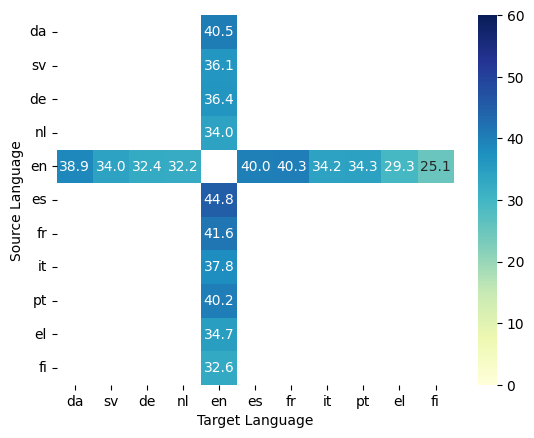

In [2]:
matrices = form_matrices(df, 'BLEU', ['deepl', 'gpt', 'deepl', 'gpt', 'deepl', 'gpt'], ['ep', 'ep', 'flores', 'flores', 'opus', 'opus'])
plot_matrix(matrices[('opus', 'deepl')])

In [3]:
merged = matrix_merger(matrices, 'dataset')
len(merged)

3

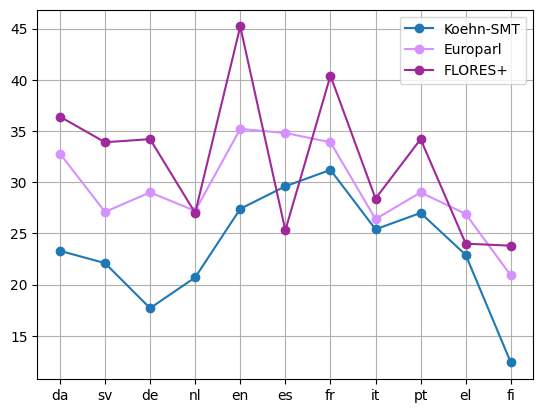

In [8]:
from scripts.presentation2 import aggregate_matrices, plot_vectors, extract_vectors
label_map = {'ep-deepl': 'Europarl-DeepL', 'ep-gpt': 'Europarl-GPT-4.1',
             'flores-deepl': 'FLORES+-DeepL', 'flores-gpt': 'FLORES+-GPT-4.1'}

LABELS = {
    'ep': 'Europarl',
    'flores': 'FLORES+',
    'opus': 'OPUS-100',
    'deepl': 'DeepL',
    'gpt': 'GPT-4.1',
    'base': 'Koehn-SMT'
}

COLORS = {
    "ep": "#d690ff",
    "opus": "#28172f",
    "flores": "#9f289b",
    "deepl": "#db1919",
    "gpt": "#10C221"
}

ag = aggregate_matrices(merged, mode='INTO', include_base=True)
plot_vectors(ag, label_map=LABELS, color_map=COLORS, include_base=True)

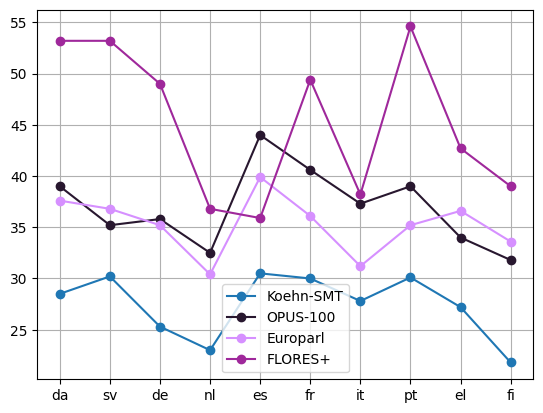

In [10]:
ve = extract_vectors(merged, mode='INTO', include_base=True)
plot_vectors(ve, label_map=LABELS, color_map=COLORS, include_base=True)

# Aggregations and Visuzalizations


In [15]:
from scripts.presentation import Presenter
p = Presenter(results_folder='final_results', metrics=['BLEU', 'chrF', 'COMET', 'BERT-F1'])

In [22]:
p.cases['ep-deepl']['BLEU']

,da,sv,de,nl,en,es,fr,it,pt,el,fi
da,NaN,31.234542,34.060691,30.864241,40.892690,37.117352,35.695082,27.567300,31.047434,28.739547,25.503815
sv,36.070289,NaN,30.591117,29.281129,39.860678,34.960895,34.811938,27.391398,31.222713,28.030284,22.447507
de,34.974381,29.996975,NaN,28.339887,37.683698,36.148667,37.804653,27.186651,30.970712,26.949964,24.586250
nl,28.717135,23.574642,25.253817,NaN,31.239803,29.104525,29.808660,23.729883,26.387243,22.466216,19.464109
en,37.497330,32.251568,32.547469,32.202903,NaN,41.137497,38.496851,29.162393,34.195964,31.901896,24.369398
es,37.065578,30.512634,32.860527,30.271553,43.274294,NaN,39.912205,30.341695,35.809157,30.696848,24.895837
fr,32.871805,28.527832,30.348471,29.003367,38.308544,37.703949,NaN,28.788980,33.227476,28.348205,22.997572
it,29.072912,24.206840,26.528497,26.338769,33.204503,34.749799,33.320046,NaN,29.982963,26.115184,19.833691
pt,32.717717,27.938150,30.738889,28.687616,37.206175,39.076059,39.056324,28.814821,NaN,28.862888,23.158269
el,34.401319,29.280422,29.992630,28.528897,39.020138,38.186257,37.261932,28.691005,34.262699,NaN,23.645183


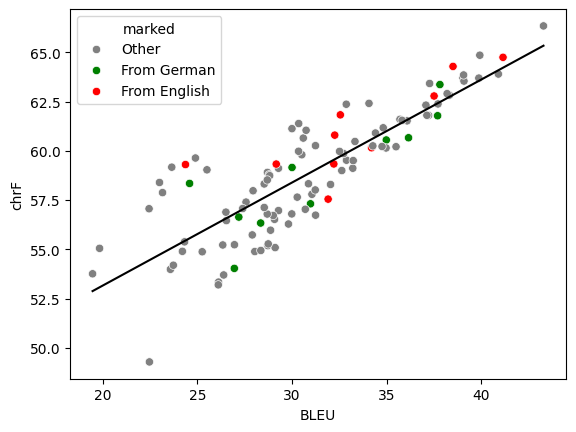

,src_lang,tgt_lang,score_x,dataset_x,translator_x,score_y,dataset_y,translator_y,marked
0,sv,da,36.070289,ep,deepl,61.521775,ep,deepl,Other
1,de,da,34.974381,ep,deepl,60.551191,ep,deepl,From German
2,nl,da,28.717135,ep,deepl,55.188750,ep,deepl,Other
3,en,da,37.497330,ep,deepl,62.784122,ep,deepl,From English
4,es,da,37.065578,ep,deepl,62.319313,ep,deepl,Other
...,...,...,...,...,...,...,...,...,...
105,es,fi,24.895837,ep,deepl,59.635552,ep,deepl,Other
106,fr,fi,22.997572,ep,deepl,58.393722,ep,deepl,Other
107,it,fi,19.833691,ep,deepl,55.049985,ep,deepl,Other
108,pt,fi,23.158269,ep,deepl,57.879771,ep,deepl,Other


In [4]:
config1 = {
    'datasets': ['ep'],
    'translators': ['deepl'],
    'src_lang': None,
    'tgt_lang': None,
    'metric': 'BLEU'
}
config2 = {
    'datasets': ['ep'],
    'translators': ['deepl'],
    'src_lang': None,
    'tgt_lang': None,
    'metric': 'chrF'
}
out, model = p.linear_regression(config1, config2, 'BLEU', 'chrF', plot=True, custom_color={'src_lang': {'en': 'red', 'de': 'green'}})
out